In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"E:\Rnw\maths\Exam\spread locator\spread_locator_dataset - spread_locator_dataset.csv.csv")
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df.head()


,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,2023-01-26,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,2023-01-28,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,2023-01-28,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,2023-01-18,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,2023-01-04,4,North,Success


In [3]:

df['occurrence'] = (df['transaction_status'] == 'Success').astype(int)


p_hat = df['occurrence'].mean()
print("Bernoulli success probability (p):", p_hat)


Bernoulli success probability (p): 0.44545454545454544


In [4]:
# Weekly transaction counts
weekly_counts = df.groupby(
    pd.Grouper(key='transaction_date', freq='W')
).size()

print(weekly_counts.describe())


count     6.000000
mean     36.666667
std      20.578306
min       6.000000
25%      23.000000
50%      45.000000
75%      50.500000
max      56.000000
dtype: float64


In [5]:
# Daily transaction counts
daily_counts = df.groupby('transaction_date').size()

# Poisson rate (λ)
lambda_hat = daily_counts.mean()
print("Poisson λ (mean daily transactions):", lambda_hat)


Poisson λ (mean daily transactions): 7.096774193548387


In [6]:
amounts = df['transaction_amount']

# Log-normal fit
ln_shape, ln_loc, ln_scale = stats.lognorm.fit(amounts, floc=0)

# Power-law fit (scipy implementation)
pl_shape, pl_loc, pl_scale = stats.powerlaw.fit(amounts)

print("Log-normal parameters:", ln_shape, ln_scale)
print("Power-law shape parameter:", pl_shape)


Log-normal parameters: 0.4749178350151927 2983.1591334067753
Power-law shape parameter: 0.41232325172331613


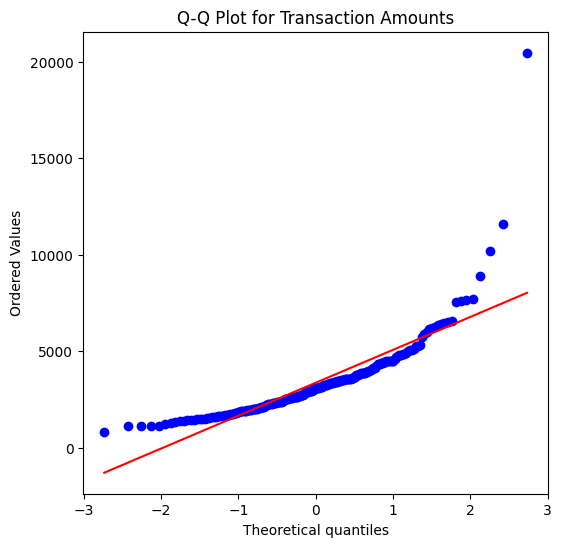

In [7]:
plt.figure(figsize=(6,6))
stats.probplot(amounts, dist="norm", plot=plt)
plt.title("Q-Q Plot for Transaction Amounts")
plt.show()


Box-Cox Lambda: -0.18083390743966327


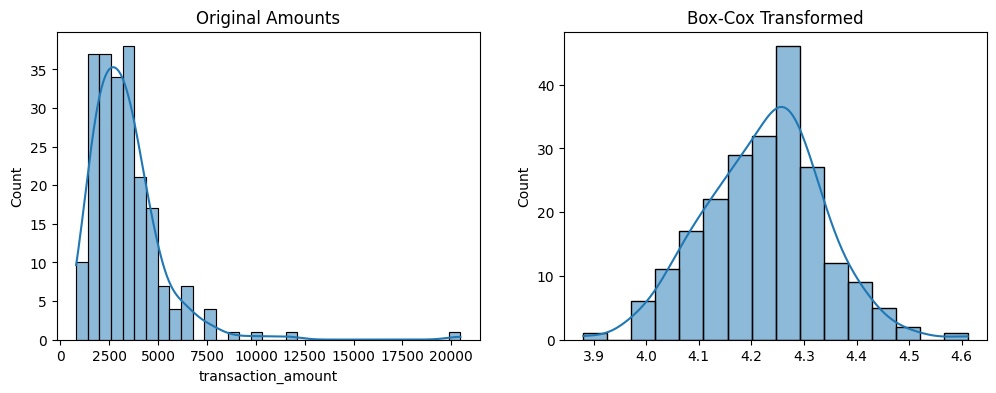

In [8]:
# Box-Cox requires positive data
amounts_pos = amounts[amounts > 0]

boxcox_transformed, lam = stats.boxcox(amounts_pos)
print("Box-Cox Lambda:", lam)

# Plot before vs after
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(amounts_pos, kde=True)
plt.title("Original Amounts")

plt.subplot(1,2,2)
sns.histplot(boxcox_transformed, kde=True)
plt.title("Box-Cox Transformed")

plt.show()


In [9]:
# Z-scores
z_scores = stats.zscore(amounts)

# Probability of transaction exceeding ₹5000
prob_exceed_5000 = (amounts > 5000).mean()

print("Probability(Transaction Amount > 5000):", prob_exceed_5000)


Probability(Transaction Amount > 5000): 0.11363636363636363


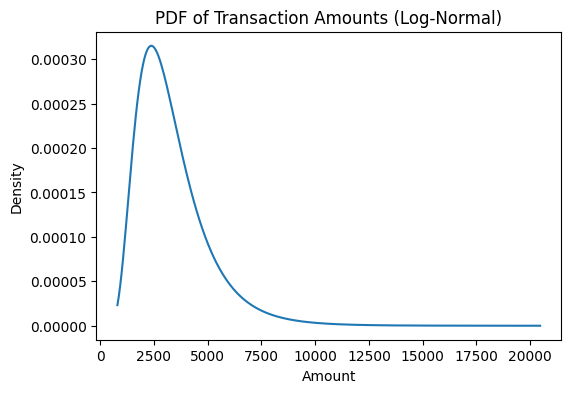

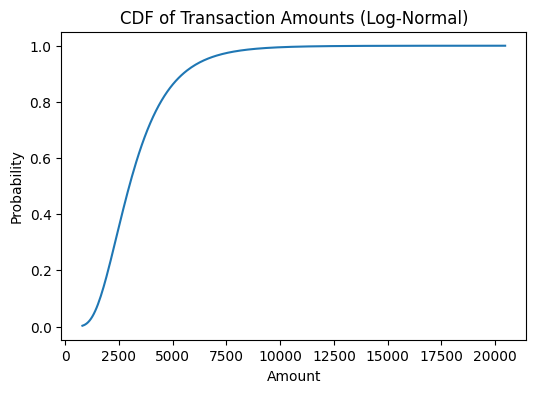

In [10]:
x = np.linspace(amounts.min(), amounts.max(), 300)

pdf = stats.lognorm.pdf(x, ln_shape, ln_loc, ln_scale)
cdf = stats.lognorm.cdf(x, ln_shape, ln_loc, ln_scale)

plt.figure(figsize=(6,4))
plt.plot(x, pdf)
plt.title("PDF of Transaction Amounts (Log-Normal)")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(x, cdf)
plt.title("CDF of Transaction Amounts (Log-Normal)")
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.show()
